In [140]:
    import pandas as pd 
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    %matplotlib inline

    import warnings
    warnings.filterwarnings('ignore')

In [141]:
data = pd.read_excel('C:\\Users\\LENOVO\\Desktop\\FLIGHT PRICE.xlsx')
data

,Unnamed: 0,Airline Names,Departure Time,Arrival Time,Source,Destination,Total Stops,Stopping Airports,Total Flight Time,Date of journey(in 2022),Fair Price
0,0,Etihad Airways,04:35,16:10,Bengaluru,New York,1 stop,Abu Dhabi,22 h 05,Oct 25,"₹ 45,338"
1,1,Delta Air Lines,02:40,12:30,Bengaluru,New York,1 stop,Amsterdam,20 h 20,Oct 25,"₹ 51,469"
2,2,Delta Air Lines,02:40,14:30,Bengaluru,New York,1 stop,Amsterdam,22 h 20,Oct 25,"₹ 51,469"
3,3,Delta Air Lines,02:40,16:30,Bengaluru,New York-LaGua,2 stop,"Amsterdam,Boston",24 h 20,Oct 25,"₹ 60,820"
4,4,Delta Air Lines,02:40,11:12,Bengaluru,+ 1 DAY\nNewark,2 stop,"Amsterdam,Minneapolis",43 h 02,Oct 25,"₹ 51,916"
...,...,...,...,...,...,...,...,...,...,...,...
1649,1649,"Air India, British Airways",13:35,20:45,New Delhi,London - City,1 stop,Frankfurt,12 h 40,Dec 4,"₹ 2,07,064"
1650,1650,"Air India, British Airways",13:35,21:20,New Delhi,London - Heath,1 stop,Frankfurt,13 h 15,Dec 4,"₹ 2,07,064"
1651,1651,"Vistara, Singapore Airlines",19:45,15:20,New Delhi,+ 1 DAY\nLondon,2 stop,"Mumbai,Singapore",25 h 05,Dec 4,"₹ 3,23,405"
1652,1652,"Vistara, Singapore Airlines",19:00,15:20,New Delhi,+ 1 DAY\nLondon,2 stop,"Mumbai,Singapore",25 h 50,Dec 4,"₹ 3,23,405"


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1654 entries, 0 to 1653
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                1654 non-null   int64 
 1   Airline Names             1654 non-null   object
 2   Departure Time            1654 non-null   object
 3   Arrival Time              1654 non-null   object
 4   Source                    1654 non-null   object
 5   Destination               1654 non-null   object
 6   Total Stops               1654 non-null   object
 7   Stopping Airports         1624 non-null   object
 8   Total Flight Time         1654 non-null   object
 9   Date of journey(in 2022)  1654 non-null   object
 10  Fair Price                1654 non-null   object
dtypes: int64(1), object(10)
memory usage: 142.3+ KB


In [4]:
data.isnull().sum()

Unnamed: 0                   0
Airline Names                0
Departure Time               0
Arrival Time                 0
Source                       0
Destination                  0
Total Stops                  0
Stopping Airports           30
Total Flight Time            0
Date of journey(in 2022)     0
Fair Price                   0
dtype: int64

In [5]:
data.shape

(1654, 11)

Mumbai                               140
London - Heathrow Apt                 81
Doha                                  72
Dubai                                 49
Hyderabad                             42
                                    ... 
Munich,Amsterdam                       1
New Delhi,Dubai,Athens                 1
Mumbai,Helsinki                        1
London - Heathrow Apt,Minneapolis      1
Hong Kong                              1
Name: Stopping Airports, Length: 151, dtype: int64


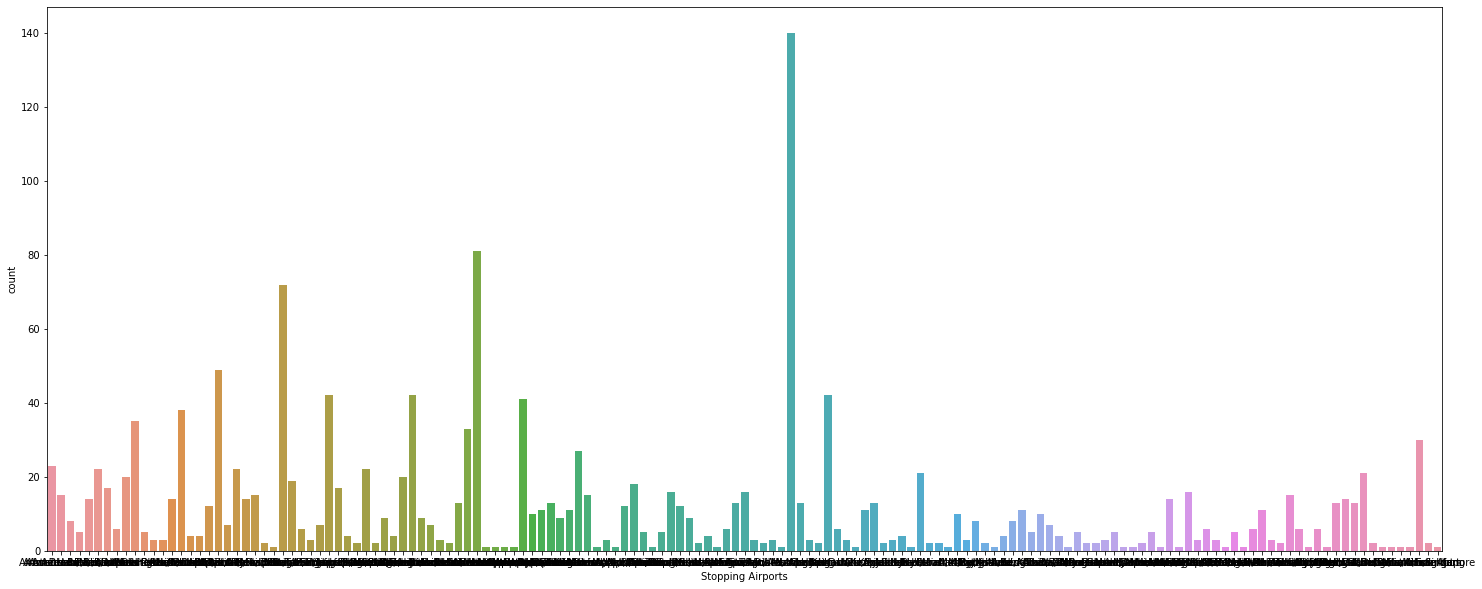

In [6]:
plt.figure(figsize=(25,10))
sns.countplot(data['Stopping Airports'])
print(data['Stopping Airports'].value_counts())

lets fill Nans in Stopping airport with Most occuring airports i.e MUMBAI

In [142]:
data['Stopping Airports'] = data['Stopping Airports'].fillna('Mumbai')

In [143]:
data.isnull().sum()

Unnamed: 0                  0
Airline Names               0
Departure Time              0
Arrival Time                0
Source                      0
Destination                 0
Total Stops                 0
Stopping Airports           0
Total Flight Time           0
Date of journey(in 2022)    0
Fair Price                  0
dtype: int64

# So there is no NULL  present in the data now 

Lets first deal with the Date of journey and make it for ML use 

In [144]:
data['Date of journey(in 2022)'] = pd.to_datetime(data['Date of journey(in 2022)'], format = "%b %d")

In [145]:
data['Day'] = data['Date of journey(in 2022)'].dt.day
data['Month'] = data['Date of journey(in 2022)'].dt.month
data.head()

,Unnamed: 0,Airline Names,Departure Time,Arrival Time,Source,Destination,Total Stops,Stopping Airports,Total Flight Time,Date of journey(in 2022),Fair Price,Day,Month
0,0,Etihad Airways,04:35,16:10,Bengaluru,New York,1 stop,Abu Dhabi,22 h 05,1900-10-25,"₹ 45,338",25,10
1,1,Delta Air Lines,02:40,12:30,Bengaluru,New York,1 stop,Amsterdam,20 h 20,1900-10-25,"₹ 51,469",25,10
2,2,Delta Air Lines,02:40,14:30,Bengaluru,New York,1 stop,Amsterdam,22 h 20,1900-10-25,"₹ 51,469",25,10
3,3,Delta Air Lines,02:40,16:30,Bengaluru,New York-LaGua,2 stop,"Amsterdam,Boston",24 h 20,1900-10-25,"₹ 60,820",25,10
4,4,Delta Air Lines,02:40,11:12,Bengaluru,+ 1 DAY\nNewark,2 stop,"Amsterdam,Minneapolis",43 h 02,1900-10-25,"₹ 51,916",25,10


In [146]:
data = data.drop('Date of journey(in 2022)',axis=1)

In [147]:
data = data.drop('Unnamed: 0',axis=1)

In [148]:
data['Departure Time'] = data['Departure Time'].str.replace(':','').astype(int)

In [149]:
data['Arrival Time'] = data['Arrival Time'].str.replace(':','').astype(int)

In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1654 entries, 0 to 1653
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline Names      1654 non-null   object
 1   Departure Time     1654 non-null   int32 
 2   Arrival Time       1654 non-null   int32 
 3   Source             1654 non-null   object
 4   Destination        1654 non-null   object
 5   Total Stops        1654 non-null   object
 6   Stopping Airports  1654 non-null   object
 7   Total Flight Time  1654 non-null   object
 8   Fair Price         1654 non-null   object
 9   Day                1654 non-null   int64 
 10  Month              1654 non-null   int64 
dtypes: int32(2), int64(2), object(7)
memory usage: 129.3+ KB


New Delhi     846
Bengaluru     627
Chandigarh    181
Name: Source, dtype: int64


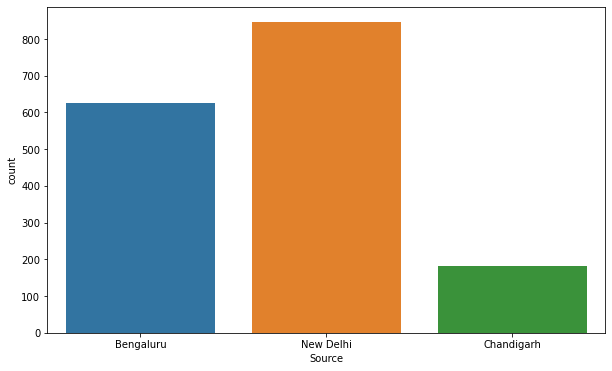

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(data['Source'])
print(data['Source'].value_counts())

+ 1 DAY\nNew Yo                    222
+ 1 DAY\nNewark                    197
New York                           195
Dubai                              173
+ 1 DAY\nDubai                     156
Newark                             132
+ 1 DAY\nLondon                    122
London - Heath                     113
+ 1 DAY\nSharja                     92
+ 1 DAY\nNew York                   71
New York-LaGua                      28
Sharjah\n(19 KM                     26
New York-LaGuardia Apt              25
+ 2 DAY\nLondon                     20
London - City                       20
Ras Al Khaimah                      17
+ 2 DAY\nNew Yo                     13
+ 1 DAY\nNew York-LaGuardia Apt     11
London - Gatwi                       7
+ 1 DAY\nRas Al                      6
+ 2 DAY\nSharja                      3
+ 2 DAY\nNewark                      3
London - Stans                       2
Name: Destination, dtype: int64


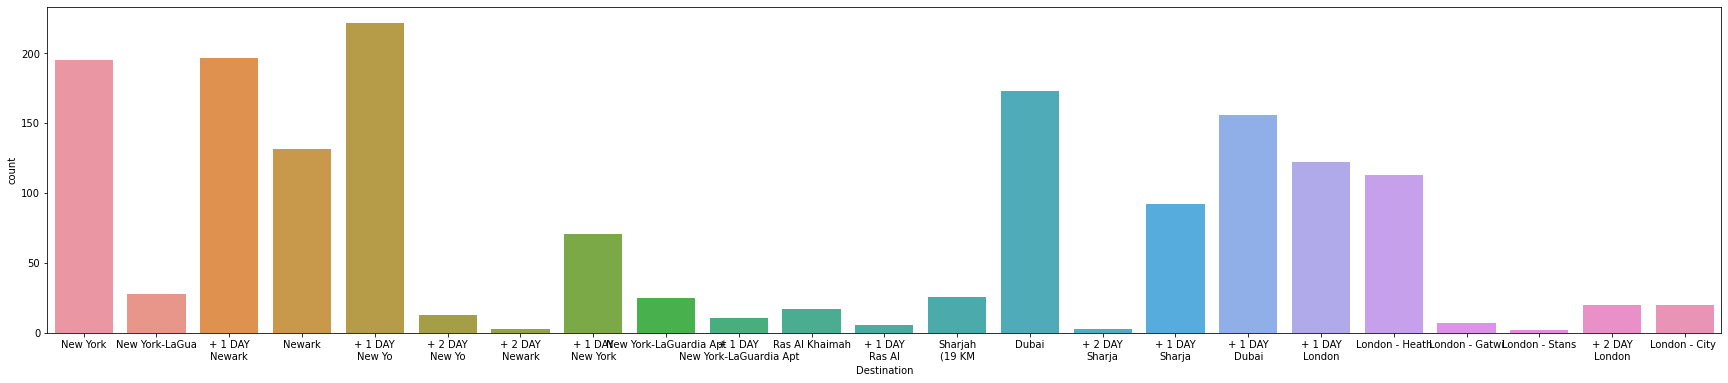

In [17]:
plt.figure(figsize=(30,6))
sns.countplot(data['Destination'])
print(data['Destination'].value_counts())

lets correct this data and make proper Destination

In [151]:
data['Destination'] = data['Destination'].replace('+ 1 DAY\nNew Yo','New York')

In [152]:
data['Destination'] = data['Destination'].replace('+ 1 DAY\nNewark','New York')

In [153]:
data['Destination'] = data['Destination'].replace('Newark','New York')

In [154]:
data['Destination'] = data['Destination'].replace('+ 1 DAY\nNew York','New York')

In [155]:
data['Destination'] = data['Destination'].replace('New York-LaGua','New York')

In [156]:
data['Destination'] = data['Destination'].replace('New York-LaGuardia Apt','New York')

In [157]:
data['Destination'] = data['Destination'].replace('+ 2 DAY\nNew Yo','New York')

In [158]:
data['Destination'] = data['Destination'].replace('+ 1 DAY\nNew York-LaGuardia Apt','New York')

In [159]:
data['Destination'] = data['Destination'].replace('+ 1 DAY\nDubai','Dubai')
data['Destination'] = data['Destination'].replace('+ 1 DAY\nSharja','Dubai')
data['Destination'] = data['Destination'].replace('Sharjah\n(19 KM','Dubai')
data['Destination'] = data['Destination'].replace('Ras Al Khaimah','Dubai')
data['Destination'] = data['Destination'].replace('+ 1 DAY\nRas Al','Dubai')
data['Destination'] = data['Destination'].replace('+ 2 DAY\nSharja','Dubai')
data['Destination'] = data['Destination'].replace('+ 2 DAY\nNewark','Dubai')


In [160]:
data['Destination'] = data['Destination'].replace('+ 1 DAY\nLondon','London - City')
data['Destination'] = data['Destination'].replace('London - Heath','London - City')
data['Destination'] = data['Destination'].replace('+ 2 DAY\nLondon','London - City')
data['Destination'] = data['Destination'].replace('London - Gatwi','London - City')
data['Destination'] = data['Destination'].replace('London - Stans','London - City')



New York          894
Dubai             476
London - City     264
London - City      20
Name: Destination, dtype: int64


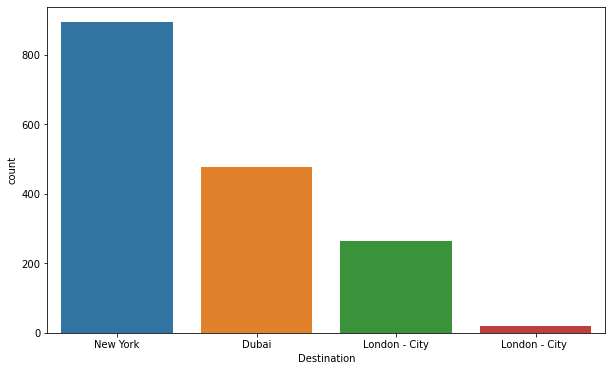

In [28]:
plt.figure(figsize=(10,6))
sns.countplot(data['Destination'])
print(data['Destination'].value_counts())

IndiGo                          165
Delta Air Lines                 156
Lufthansa                        89
Vistara, Emirates                88
Vistara, Air France              86
                               ... 
Go First, Singapore Airlines      1
Air India, Emirates               1
Biman Bangladesh                  1
Akasa Air, IndiGo                 1
Cathay Pacific                    1
Name: Airline Names, Length: 110, dtype: int64


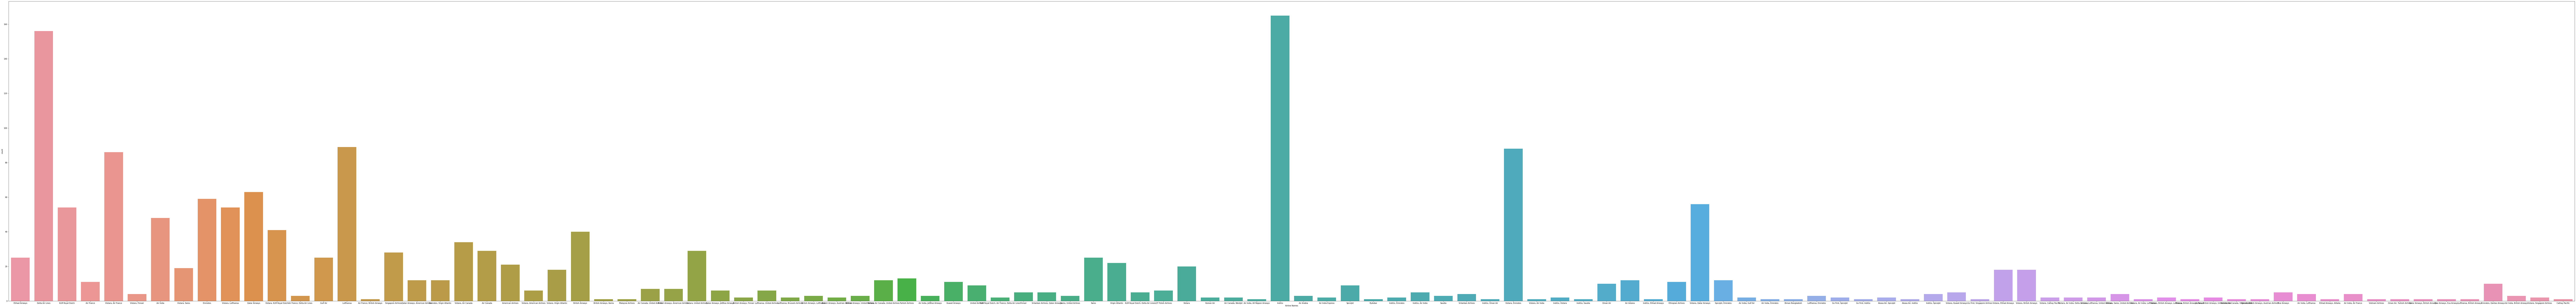

In [29]:
plt.figure(figsize=(250,30))
sns.countplot(data['Airline Names'])
print(data['Airline Names'].value_counts())

INDIGO AND DELTA AIR LINES ARE THE AIRLINES THAT TAKEN BY THE CUSTOMER MAXIMUM FOR THE TRIP

2 stop     847
1 stop     773
Non sto     30
3 stop       4
Name: Total Stops, dtype: int64


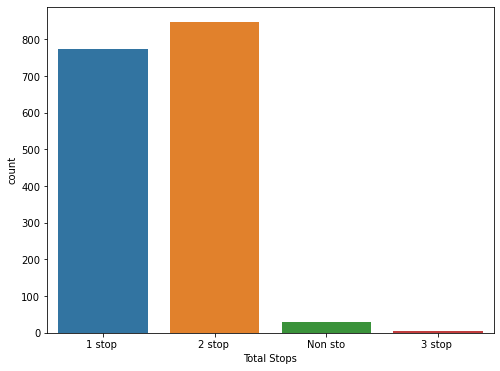

In [30]:
plt.figure(figsize=(8,6))
sns.countplot(data['Total Stops'])
print(data['Total Stops'].value_counts())

SO THE FLIGHT HAVE MAXIMUM  2 STOPS BETWEEN ITS TRIP FOLLOWED BY 1 STOP

THERE ARE 30 FLIGHTS WHICH ARE NON STOP TO THE DESTINATIONS

In [31]:
print(data['Total Flight Time'].value_counts())

25 h 25    14
27 h 20    12
22 h 15    12
28 h 25    11
35 h 25    11
           ..
23 h 25     1
27 h 19     1
10 h 44     1
13 h 45     1
11 h 25     1
Name: Total Flight Time, Length: 575, dtype: int64


In [161]:
data['Fair Price'] = data['Fair Price'].str.replace('₹','')

In [162]:
data['Fair Price'] = data['Fair Price'].str.replace(',','').astype(int)

In [163]:
data['Fair Price'] = data['Fair Price'].astype('int64')

In [164]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1654 entries, 0 to 1653
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline Names      1654 non-null   object
 1   Departure Time     1654 non-null   int32 
 2   Arrival Time       1654 non-null   int32 
 3   Source             1654 non-null   object
 4   Destination        1654 non-null   object
 5   Total Stops        1654 non-null   object
 6   Stopping Airports  1654 non-null   object
 7   Total Flight Time  1654 non-null   object
 8   Fair Price         1654 non-null   int64 
 9   Day                1654 non-null   int64 
 10  Month              1654 non-null   int64 
dtypes: int32(2), int64(3), object(6)
memory usage: 129.3+ KB


<AxesSubplot:xlabel='Airline Names', ylabel='Fair Price'>

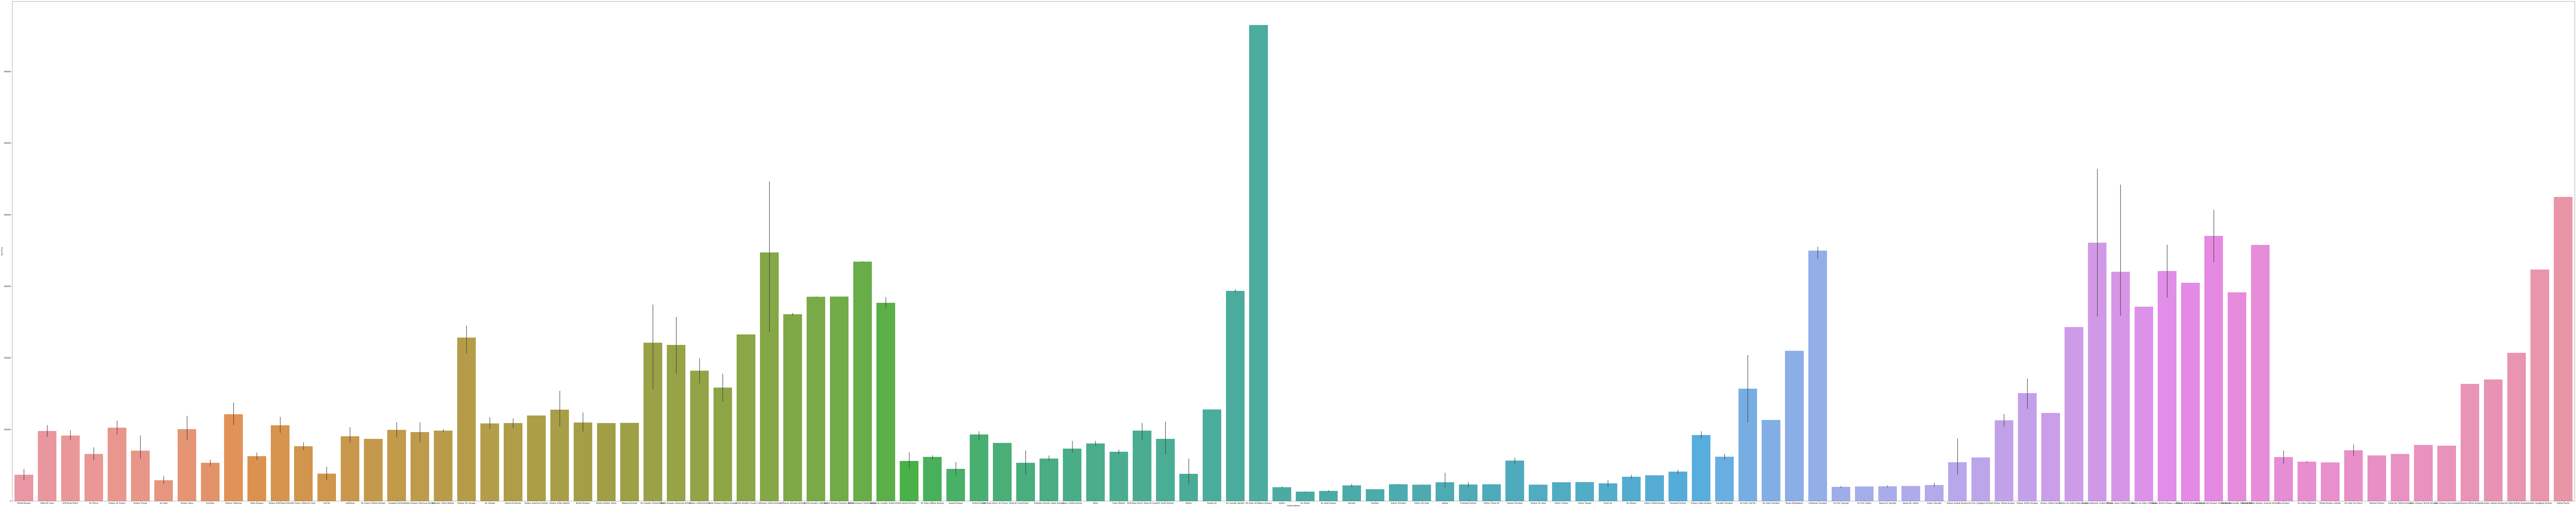

In [36]:
plt.figure(figsize=(250,50))
sns.barplot(x='Airline Names',y='Fair Price',data=data)

Clearly we saw that the flight price for many airlines crosses 3.5 lakh toolike (LUFTHANSA, VISTARA, AMERICAN EXPRESS and some more.) 

But in many flights like (AIR INDIA , INDIGO ,AIR ASTANA,QATAR AIRWAYS etc ) gives more reliable and cheapest flights for the Flight

<AxesSubplot:xlabel='Airline Names', ylabel='Fair Price'>

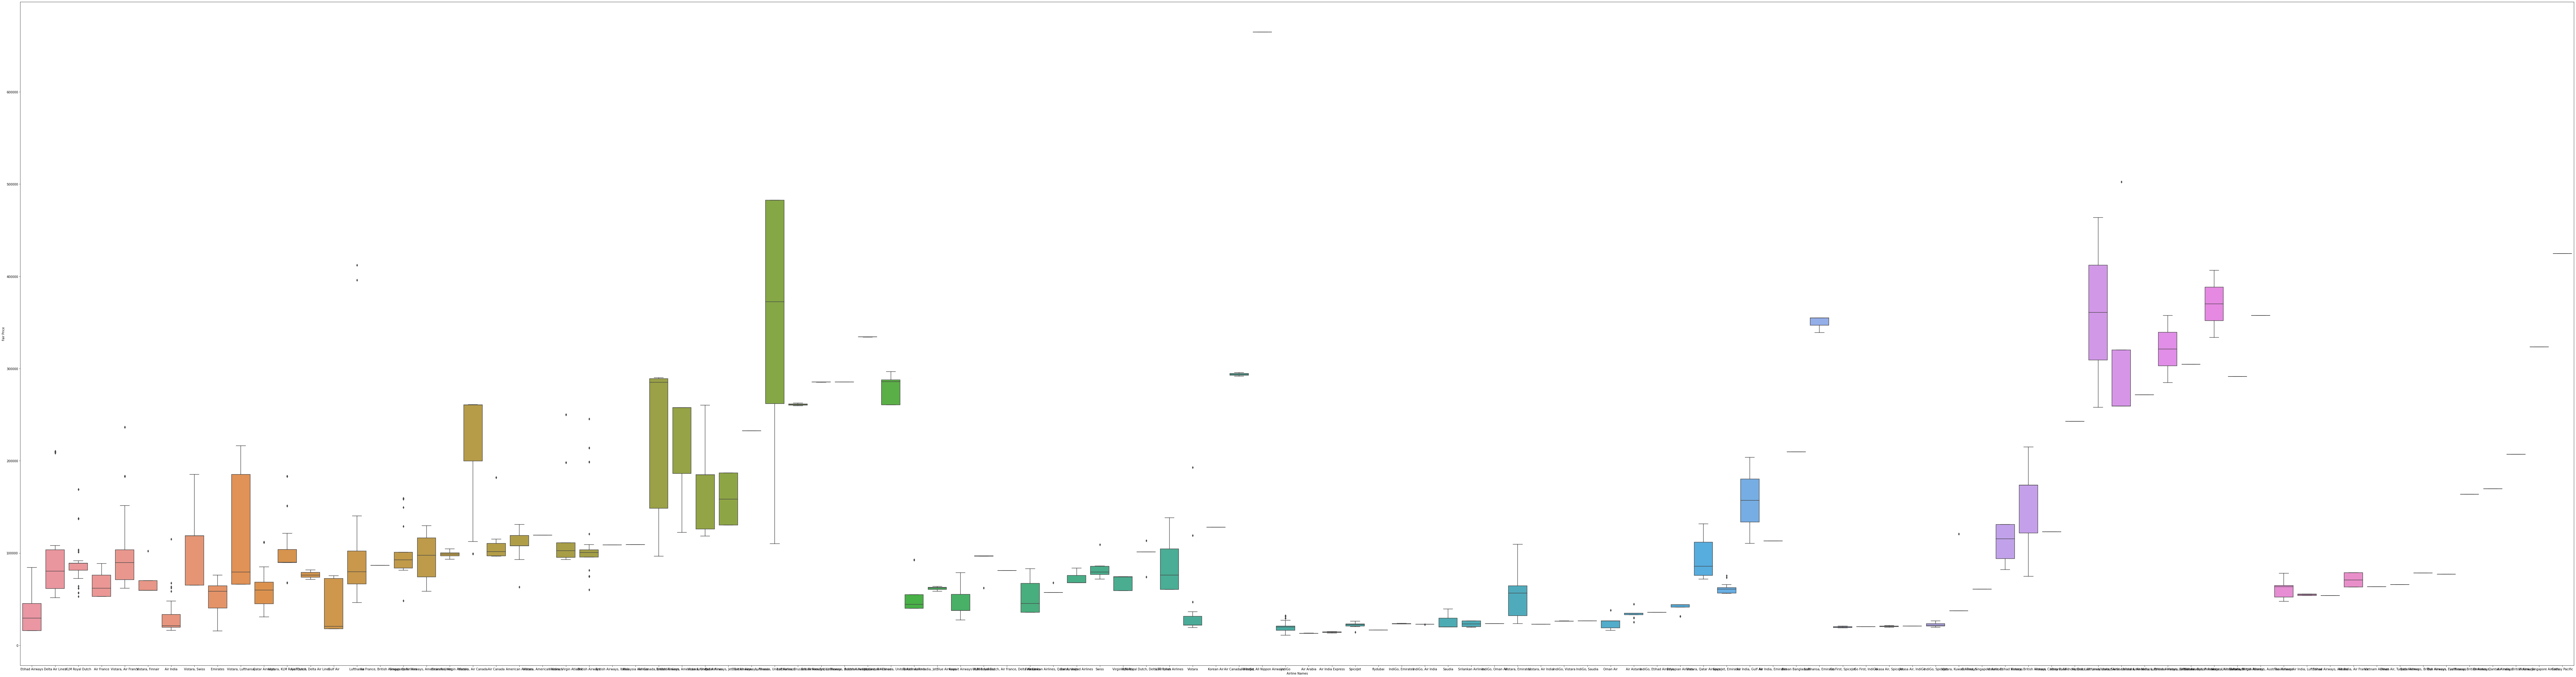

In [37]:
plt.figure(figsize=(150,40))
sns.boxplot(x='Airline Names',y='Fair Price',data=data)

LUFTHANSA AND UNITED AIRLINE SHOWS THE BIGGEST PRICE RANGE FOR THE FLIGHTS

INDIGO , SPICEJET , AIR INDIA , QATAR AIRWAYS(ETC.) shows the lowest price range 

<AxesSubplot:xlabel='Source', ylabel='Fair Price'>

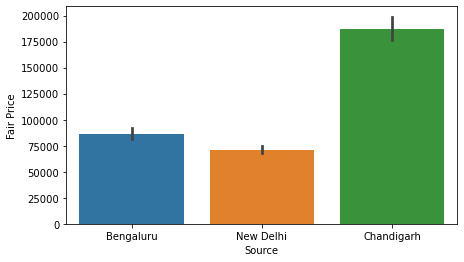

In [38]:
plt.figure(figsize=(7,4))
sns.barplot(x='Source',y='Fair Price',data=data)

The customer which departs from Chandigarh souce has max Price Fair

<AxesSubplot:xlabel='Destination', ylabel='Fair Price'>

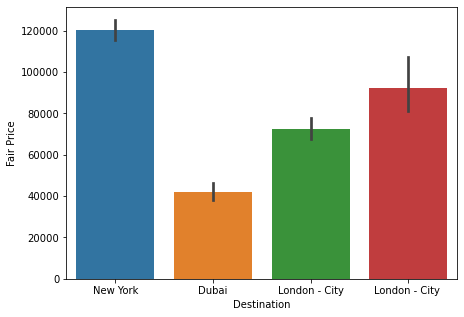

In [39]:
plt.figure(figsize=(7,5))
sns.barplot(x='Destination',y='Fair Price',data=data)

The Customer whose Destination is New York have more Fair Price

In [165]:
data['Total Flight Time'] = data['Total Flight Time'].str.replace(' h','')

In [166]:
data['Total Flight Time'] = data['Total Flight Time'].str.replace('\n','')

In [167]:
data['Total Flight Time'] = data['Total Flight Time'].str.replace(' ','')

In [168]:
data['Total Flight Time'] = data['Total Flight Time'].str.replace('No','')

In [169]:
data['Total Flight Time'] = data['Total Flight Time'].astype('int64')

<AxesSubplot:xlabel='Total Flight Time', ylabel='Fair Price'>

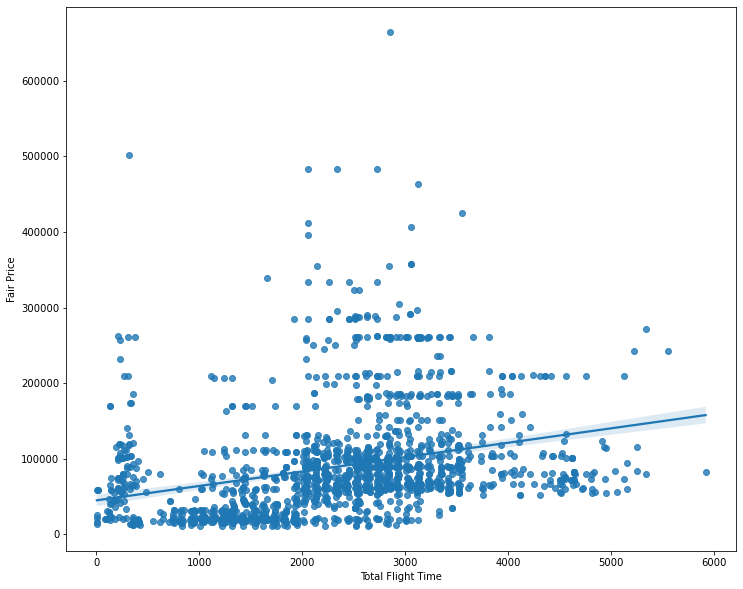

In [45]:
plt.figure(figsize=(12,10))
sns.regplot(x='Total Flight Time',y='Fair Price',data=data)

WE CAN SEE FROM THIS GRAPH AS THE TOTAL TIME OF THE FLIGHT INCREASES THEN THE PRICE ALSO INCREASES OF THE FLIGHT

<AxesSubplot:xlabel='Month', ylabel='Fair Price'>

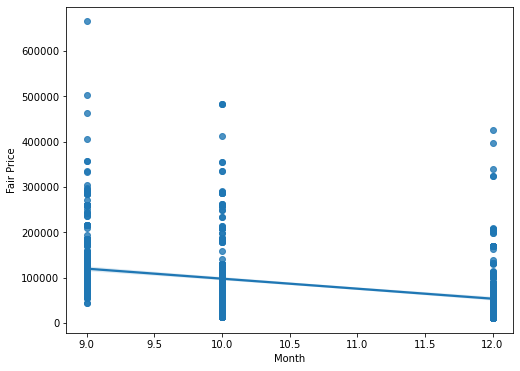

In [46]:
plt.figure(figsize=(8,6))
sns.regplot(x='Month',y='Fair Price',data=data)

FROM THIS GRAPH WE CAN UNDERSTAND THE PRICE OF THE TREND 

AS WE BOOKED A TICKET NEARBY OUR CURRENT DATE THEN THE PRICE IS VERY HIGH AS COMPARE TO THE DATES OF COMING MONTHS ..

IT MEANS PRICE WILL BE CHEAPER IF WE BOOKED A TICKET BEFORE 2 3 MONTHS..


Note:- In my dataset there is no JET AIRWAYS airline so cant compare the prices between Jet airways and Indigo ..
    
       But from the data we can say that Indigo is very cheaper from many flights in this datset.

In [170]:
from sklearn.preprocessing import LabelEncoder

In [171]:
le = LabelEncoder()
var_mode = ['Airline Names','Source','Destination','Total Stops','Stopping Airports']

for i in var_mode:
    data[i] = le.fit_transform(data[i])

In [172]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1654 entries, 0 to 1653
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Airline Names      1654 non-null   int32
 1   Departure Time     1654 non-null   int32
 2   Arrival Time       1654 non-null   int32
 3   Source             1654 non-null   int32
 4   Destination        1654 non-null   int32
 5   Total Stops        1654 non-null   int32
 6   Stopping Airports  1654 non-null   int32
 7   Total Flight Time  1654 non-null   int64
 8   Fair Price         1654 non-null   int64
 9   Day                1654 non-null   int64
 10  Month              1654 non-null   int64
dtypes: int32(7), int64(4)
memory usage: 97.0 KB


Since all object datatype is usuable now for the ML as we changed its datatype from object into int


In [50]:
data.describe()

,Airline Names,Departure Time,Arrival Time,Source,Destination,Total Stops,Stopping Airports,Total Flight Time,Fair Price,Day,Month
count,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000
mean,57.936518,1071.816808,1510.340387,1.132406,1.805320,0.571342,81.511487,2349.445586,89760.062273,19.255744,10.353083
std,30.840733,733.140249,538.910587,0.934647,1.347021,0.598992,39.572850,1059.119129,70933.531932,8.552561,1.212907
min,0.000000,5.000000,15.000000,0.000000,0.000000,0.000000,0.000000,4.000000,10896.000000,4.000000,9.000000
25%,30.000000,340.000000,1210.000000,0.000000,0.000000,0.000000,48.000000,1646.250000,44847.000000,10.000000,9.000000
50%,55.000000,945.000000,1600.000000,2.000000,3.000000,1.000000,89.000000,2455.000000,74738.000000,24.000000,10.000000
75%,85.000000,1850.000000,1935.000000,2.000000,3.000000,1.000000,114.000000,3005.000000,103527.000000,25.000000,12.000000
max,109.000000,2350.000000,2359.000000,2.000000,3.000000,3.000000,150.000000,5915.000000,664796.000000,26.000000,12.000000


In [51]:
data.corr()

,Airline Names,Departure Time,Arrival Time,Source,Destination,Total Stops,Stopping Airports,Total Flight Time,Fair Price,Day,Month
Airline Names,1.000000,0.348318,-0.087023,-0.123134,0.108351,0.286248,0.188747,0.216676,0.200078,0.001635,-0.108904
Departure Time,0.348318,1.000000,-0.222807,-0.119145,-0.093594,0.124593,0.139798,0.028096,0.065974,0.031349,0.003214
Arrival Time,-0.087023,-0.222807,1.000000,-0.049064,0.161059,0.041776,-0.021040,0.054621,-0.011337,0.137591,-0.136485
Source,-0.123134,-0.119145,-0.049064,1.000000,-0.185173,-0.120079,-0.239733,-0.117479,-0.126291,-0.110645,0.366974
Destination,0.108351,-0.093594,0.161059,-0.185173,1.000000,0.281895,0.300460,0.504495,0.488056,0.488588,-0.707340
Total Stops,0.286248,0.124593,0.041776,-0.120079,0.281895,1.000000,0.206844,0.258657,0.157302,0.152845,-0.198731
Stopping Airports,0.188747,0.139798,-0.021040,-0.239733,0.300460,0.206844,1.000000,0.201369,0.274243,0.126678,-0.249792
Total Flight Time,0.216676,0.028096,0.054621,-0.117479,0.504495,0.258657,0.201369,1.000000,0.284751,0.201127,-0.366045
Fair Price,0.200078,0.065974,-0.011337,-0.126291,0.488056,0.157302,0.274243,0.284751,1.000000,0.211916,-0.377592
Day,0.001635,0.031349,0.137591,-0.110645,0.488588,0.152845,0.126678,0.201127,0.211916,1.000000,-0.441897


<AxesSubplot:>

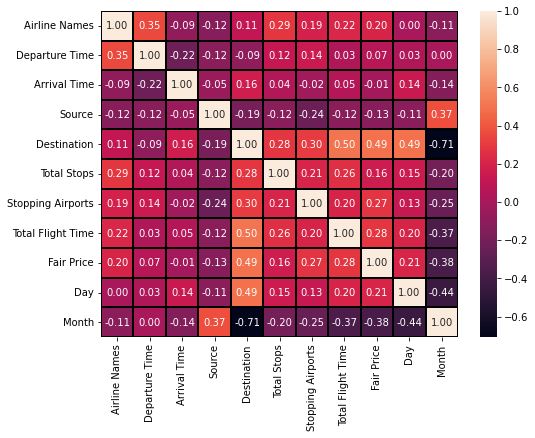

In [52]:
# plot a heatmap

plt.figure(figsize=(8,6))
sns.heatmap(data.corr(),annot=True,linewidth = 0.2,linecolor = 'black',fmt='0.2f')

 As we can seee from the heatmap that Multicollinearity cant be seen here , it means there are not highly correlatio present between the Features

In [173]:
# seprating the columns into features and target

x= data.drop("Fair Price",axis=1)
y= data["Fair Price"]

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [55]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled= sc.fit_transform(x)

In [56]:
x_scaled.shape[1]

10

In [57]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["features"] = x.columns

vif

,vif,features
0,1.277942,Airline Names
1,1.259970,Departure Time
2,1.091169,Arrival Time
3,1.230312,Source
4,2.772929,Destination
5,1.200630,Total Stops
6,1.195350,Stopping Airports
7,1.409189,Total Flight Time
8,1.385987,Day
9,2.328514,Month


This is one more proof as Multicollinearity not present in the dataset as the vif value is lower than 5

# So Now we are ready to build our model to predict the SALEPRICE

In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x= sc.fit_transform(x)

# 1)WITH LINEAR REGRESSION

In [59]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [174]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    print("At random state",i , "the training accuracy is",  {r2_score(y_train,pred_train)})
    
    print("At random state",i , "the testing accuracy is" , {r2_score(y_test,pred_test)})
    print("\n")

At random state 0 the training accuracy is {0.27695670040743026}
At random state 0 the testing accuracy is {0.28565996575747543}


At random state 1 the training accuracy is {0.2586441885982963}
At random state 1 the testing accuracy is {0.3519813154050272}


At random state 2 the training accuracy is {0.3062268320758482}
At random state 2 the testing accuracy is {0.19977129706615826}


At random state 3 the training accuracy is {0.26527905953587416}
At random state 3 the testing accuracy is {0.31614568589405245}


At random state 4 the training accuracy is {0.2784240463851251}
At random state 4 the testing accuracy is {0.2855660353417768}


At random state 5 the training accuracy is {0.26971304791868156}
At random state 5 the testing accuracy is {0.3128117278576432}


At random state 6 the training accuracy is {0.2694894799627273}
At random state 6 the testing accuracy is {0.3168671548334878}


At random state 7 the training accuracy is {0.2776998020842283}
At random state 7 the testi

In [179]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.25,random_state=1)

In [180]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
print("Accuracy",r2_score(y_test,pred_lr)*100)


Accuracy 35.19813154050272


In [181]:
from sklearn.model_selection import cross_val_score

In [192]:
scr_lr = cross_val_score(lr,x_train,y_train,cv=3)
print("Cross Validation Score of Linear regression model is :- ",scr_lr.mean())

Cross Validation Score of Linear regression model is :-  0.25095700828791856


In [65]:
from sklearn import metrics

In [193]:
MAE = metrics.mean_absolute_error(y_test,pred_lr)
MSE = metrics.mean_squared_error(y_test,pred_lr)

In [194]:
print("mean absolute error:",MAE)
print("mean squared error:",MSE)

mean absolute error: 37691.050907144265
mean squared error: 3062190462.31693


In [195]:
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 55337.06228484604


# 2) WITH LASSO

In [69]:
from sklearn.linear_model import Lasso

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
from sklearn.linear_model import Lasso
parameters = {'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(2,10))}

ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 10, 'random_state': 2}


In [72]:
ls = Lasso(alpha=10,random_state=2)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)


In [73]:
lss = r2_score(y_test,pred_ls)
lss

0.3519865049303681

In [197]:
scr_ls = cross_val_score(ls,x_train,y_train,cv=3)
print("Cross Validation Score of Linear regression model is :- ",scr_ls.mean())

Cross Validation Score of Linear regression model is :-  0.2509679779831808


In [75]:
MAE = metrics.mean_absolute_error(y_test,pred_ls)
MSE = metrics.mean_squared_error(y_test,pred_ls)

In [76]:
print("mean absolute error:",MAE)
print("mean squared error:",MSE)

mean absolute error: 37688.43802586024
mean squared error: 3062165939.389766


In [77]:
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 55336.84070661937


# 3) WITH RANDOMFOREST REGRESSOR

In [78]:
from sklearn.ensemble import RandomForestRegressor

In [79]:
rf = RandomForestRegressor(criterion="mae",max_features="auto",max_depth=4,min_samples_leaf=4)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_dec = rf.predict(x_test)

In [198]:
rfs = r2_score(y_test,pred_dec)
print('R2 Score:',rfs*100)
rf_score = cross_val_score(rf,x_train,y_train,cv=3)
rfc = rf_score.mean()
print("Cross val Score :",rfc*100)

R2 Score: 47.820529616281014
Cross val Score : 32.12282989815389


In [81]:
MAE = metrics.mean_absolute_error(y_test,pred_dec)
MSE = metrics.mean_squared_error(y_test,pred_dec)

In [82]:
print("mean absolute error:",MAE)
print("mean squared error:",MSE)

mean absolute error: 26746.432198067632
mean squared error: 2465723293.7294316


In [83]:
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 49656.04992072398


# 4) WITH ADABOOST REGRESSOR

In [84]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV

In [85]:
params = {'n_estimators':[47,50,60,70],'learning_rate':[0.25,0.30,0.40]}

In [86]:
rnd_srch = RandomizedSearchCV(AdaBoostRegressor(),cv=3,param_distributions=params)

In [87]:
rnd_srch.fit(x_train,y_train)

RandomizedSearchCV(cv=3, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.25, 0.3, 0.4],
                                        'n_estimators': [47, 50, 60, 70]})

In [88]:
rnd_srch.best_estimator_

AdaBoostRegressor(learning_rate=0.25)

In [89]:
ada = AdaBoostRegressor(learning_rate=0.3,n_estimators=47)

In [90]:
ada.fit(x_train,y_train)

AdaBoostRegressor(learning_rate=0.3, n_estimators=47)

In [91]:
y_pred = ada.predict(x_test)

print(r2_score(y_test,y_pred))

0.3181569331182663


In [199]:
cv_score = cross_val_score(ada,x_train,y_train,cv=3)
cv_mean = cv_score.mean()
cv_mean

0.24391596863149967

In [93]:
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)

In [94]:
print("mean absolute error:",MAE)
print("mean squared error:",MSE)

mean absolute error: 47959.44700783347
mean squared error: 3222026441.270251


In [95]:
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 56762.89669555502


# 5) WITH GRADIENT BOOSTING REGRESSOR

In [96]:
from sklearn.ensemble import GradientBoostingRegressor

In [115]:
gbd = GradientBoostingRegressor()
gbd.fit(x_train,y_train)
pred_gbd=gbd.predict(x_test)
print("Accuracy",r2_score(y_test,pred_gbd)*100)

Accuracy 75.48773523960267


In [200]:
cv_score = cross_val_score(gbd,x_train,y_train,cv=3)
cv_mean = cv_score.mean()
cv_mean

0.6033506579195471

In [99]:
MAE = metrics.mean_absolute_error(y_test,pred_gbd)
MSE = metrics.mean_squared_error(y_test,pred_gbd)

In [100]:
print("mean absolute error:",MAE)
print("mean squared error:",MSE)

mean absolute error: 22498.107278313702
mean squared error: 1219537820.7829628


In [101]:
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 34921.88169018048


# SO THE DIFFERENCE BETWEEN THE CROSS VAL SCORE AND THE

# ACCUARCY SCORE IS MINIMUM FOR THE GBDT algo AND IT ALSO GIVE 
# BEST ACCURACY, AS WELL AS HAVING LESS MEAN SQUARED ERROR
# THAN OTHERS THTAS Y WE USED THIS ALGO FOR PREDICTION

# BUT BEFORE USED HYPERPARAMETER TUNING WITH GRIDSEARCHCV on gbd

In [102]:
grid_params = {'max_depth':range(4,8),'min_samples_split':range(2,8,2),'learning_rate':np.arange(0.1,0.3)}

clf = GridSearchCV(GradientBoostingRegressor(),param_grid=grid_params)
clf.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': array([0.1]),
                         'max_depth': range(4, 8),
                         'min_samples_split': range(2, 8, 2)})

In [103]:
print(clf.best_params_)

{'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 4}


In [104]:
gbd = GradientBoostingRegressor(max_depth = 6, min_samples_split = 2, learning_rate = 0.1)

In [105]:
gbd.fit(x_train,y_train)

GradientBoostingRegressor(max_depth=6)

In [106]:
y_preds = gbd.predict(x_test)

In [107]:
print("ACCURACY",r2_score(y_test,y_preds))

ACCURACY 0.8078128073195645


# Hence the accuracy is increased after the tuning, so or model is ready to predict the Price of the car with a accuracy of 80%

In [108]:
# saving the model for later prediction
import pickle

In [109]:
filename = 'Price Pred of the car.pickle'
pickle.dump(gbd,open(filename,'wb'))

# HENCE MY MODEL IS READY TO PREDICT